In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_excel('customer_retention_dataset.xlsx')
df.head()

,Gender of respondent,How old are you?,Which city do you shop online from?,What is the Pin Code of where you shop online from?,Since How Long You are Shopping Online ?,How many times you have made an online purchase in the past 1 year?,How do you access the internet while shopping on-line?,Which device do you use to access the online shopping?,What is the screen size of your mobile device?\t\t\t\t\t\t,What is the operating system (OS) of your device?\t\t\t\t,...,"Longer time to get logged in (promotion, sales period)","Longer time in displaying graphics and photos (promotion, sales period)","Late declaration of price (promotion, sales period)","Longer page loading time (promotion, sales period)","Limited mode of payment on most products (promotion, sales period)",Longer delivery period,Change in website/Application design,Frequent disruption when moving from one page to another,Website is as efficient as before,Which of the Indian online retailer would you recommend to a friend?
0,Male,31-40 years,Delhi,110009,Above 4 years,31-40 times,Dial-up,Desktop,Others,Window/windows Mobile,...,Amazon.in,Amazon.in,Flipkart.com,Flipkart.com,Amazon.in,Paytm.com,Flipkart.com,Amazon.in,Amazon.in,Flipkart.com
1,Female,21-30 years,Delhi,110030,Above 4 years,41 times and above,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Amazon.in, Flipkart.com",Myntra.com,snapdeal.com,Snapdeal.com,Snapdeal.com,Snapdeal.com,Amazon.in,Myntra.com,"Amazon.in, Flipkart.com","Amazon.in, Myntra.com"
2,Female,21-30 years,Greater Noida,201308,3-4 years,41 times and above,Mobile Internet,Smartphone,5.5 inches,Android,...,Myntra.com,Myntra.com,Myntra.com,Myntra.com,Amazon.in,Paytm.com,Paytm.com,Paytm.com,Amazon.in,"Amazon.in, Paytm.com, Myntra.com"
3,Male,21-30 years,Karnal,132001,3-4 years,Less than 10 times,Mobile Internet,Smartphone,5.5 inches,IOS/Mac,...,Snapdeal.com,"Myntra.com, Snapdeal.com",Myntra.com,Paytm.com,Paytm.com,Paytm.com,"Amazon.in, Flipkart.com","Amazon.in, Flipkart.com","Amazon.in, Flipkart.com, Paytm.com","Amazon.in, Flipkart.com"
4,Female,21-30 years,Bangalore,530068,2-3 years,11-20 times,Wi-Fi,Smartphone,4.7 inches,IOS/Mac,...,"Flipkart.com, Paytm.com",Paytm.com,Paytm.com,Paytm.com,Snapdeal.com,Paytm.com,Amazon.in,Snapdeal.com,Paytm.com,"Amazon.in, Myntra.com"


In [4]:
df.isnull().sum()

Gender of respondent                                                    0
How old are you?                                                        0
Which city do you shop online from?                                     0
What is the Pin Code of where you shop online from?                     0
Since How Long You are Shopping Online ?                                0
                                                                       ..
Longer delivery period                                                  0
Change in website/Application design                                    0
Frequent disruption when moving from one page to another                0
Website is as efficient as before                                       0
Which of the Indian online retailer would you recommend to a friend?    0
Length: 71, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                       --------------  ----- 
 0   Gender of respondent                                                                                                                                                                                         269 non-null    object
 1   How old are you?                                                                                                                                                                               

In [6]:
print('data shape:',df.shape)

data shape: (269, 71)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                       --------------  ----- 
 0   Gender of respondent                                                                                                                                                                                         269 non-null    object
 1   How old are you?                                                                                                                                                                               

there is no null value present in the dataset 

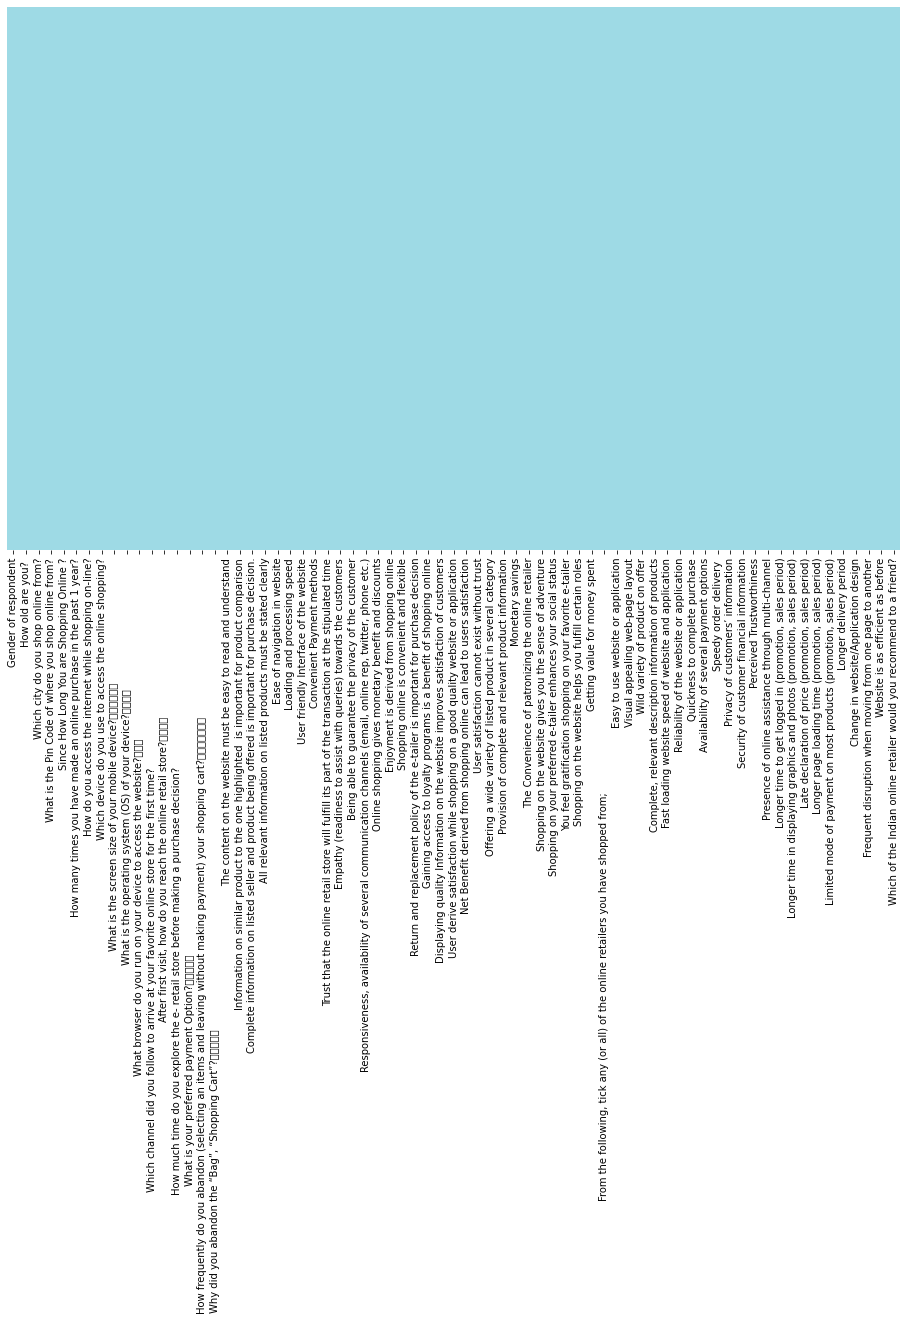

In [8]:
plt.figure(figsize=(16,10))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='tab20_r')
plt.show()

In [9]:
for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+ ':' +str(df[column].unique()))
        print(df[column].value_counts())
        print('__________________________________________________')
        print('\n')

Gender of respondent:['Male' 'Female']
Female    181
Male       88
Name: Gender of respondent, dtype: int64
__________________________________________________


How old are you? :['31-40 years' '21-30 years' '41-50 yaers' 'Less than 20 years'
 '51 years and above']
31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: How old are you? , dtype: int64
__________________________________________________


Which city do you shop online from?:['Delhi' 'Greater Noida' 'Karnal ' 'Bangalore ' 'Noida' 'Solan'
 'Moradabad' 'Gurgaon ' 'Merrut' 'Ghaziabad' 'Bulandshahr']
Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Which city do you shop online from?, dtype: int64
__________________________________________________


Since How Long You are Shoppi

In [10]:
df.drop(columns=['What is the Pin Code of where you shop online from?'],inplace=True)

I AM DROPPING THIS COLUMN BECAUSE ALL THE VALUES ARE UNIQUE.

In [11]:
print('dataset shape:', df.shape)

dataset shape: (269, 70)


# EDA PROCESS.

Female    181
Male       88
Name: Gender of respondent, dtype: int64


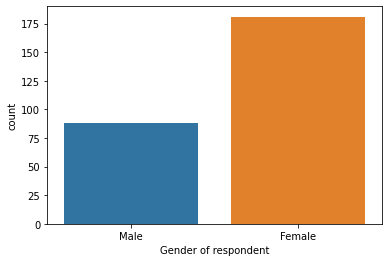

In [12]:
sns.countplot(x=df['Gender of respondent'])
print(df['Gender of respondent'].value_counts())

FEMALES DO MORE ONLINE SHOPPING THAN MENS.

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: How old are you? , dtype: int64


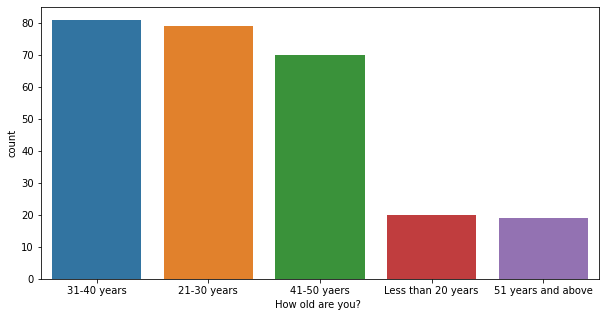

In [19]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['How old are you? '])
print(df['How old are you? '].value_counts())

mostly people who are in age bracket of 31-40 do more shopping as compared to people who are in age bracket of 51 years and above which are least

Delhi            58
Greater Noida    43
Noida            40
Bangalore        37
Karnal           27
Ghaziabad        18
Solan            18
Gurgaon          12
Merrut            9
Moradabad         5
Bulandshahr       2
Name: Which city do you shop online from?, dtype: int64


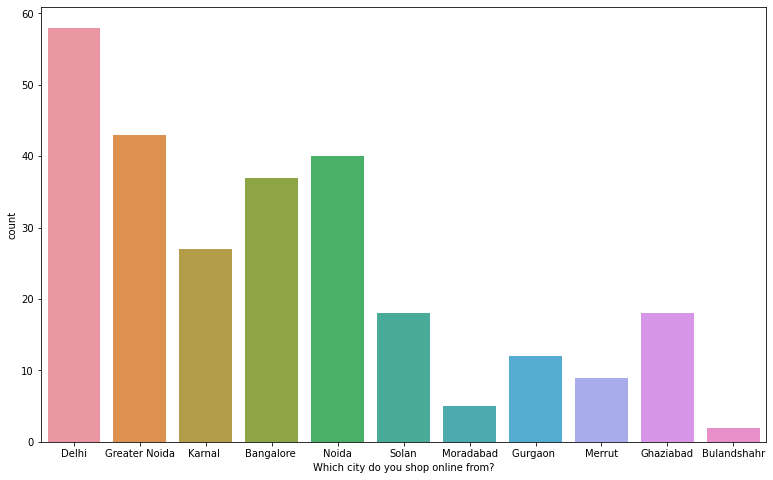

In [22]:
plt.figure(figsize=(13,8))
sns.countplot(x=df['Which city do you shop online from?'])
print(df['Which city do you shop online from?'].value_counts())

people from delhi do more shopping as compared to other cities.

Above 4 years       98
2-3 years           65
3-4 years           47
Less than 1 year    43
1-2 years           16
Name: Since How Long You are Shopping Online ?, dtype: int64


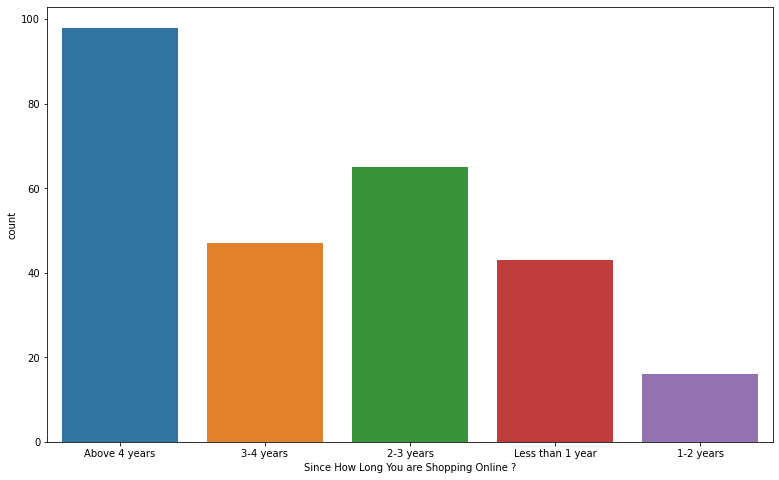

In [23]:
plt.figure(figsize=(13,8))
sns.countplot(x=df['Since How Long You are Shopping Online ?'])
print(df['Since How Long You are Shopping Online ?'].value_counts())

mostly people are doing online shopping from a long time now

Less than 10 times    114
31-40 times            63
41 times and above     47
11-20 times            29
21-30 times            10
42 times and above      6
Name: How many times you have made an online purchase in the past 1 year?, dtype: int64


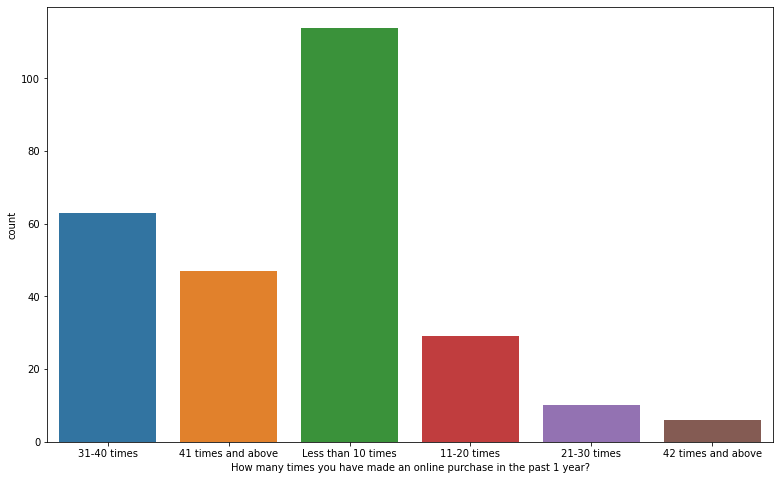

In [24]:
plt.figure(figsize=(13,8))
sns.countplot(x=df['How many times you have made an online purchase in the past 1 year?'])
print(df['How many times you have made an online purchase in the past 1 year?'].value_counts())

this picture shows how frequent the purchases of people are.

Mobile internet    142
Wi-Fi               76
Mobile Internet     47
Dial-up              4
Name: How do you access the internet while shopping on-line?, dtype: int64


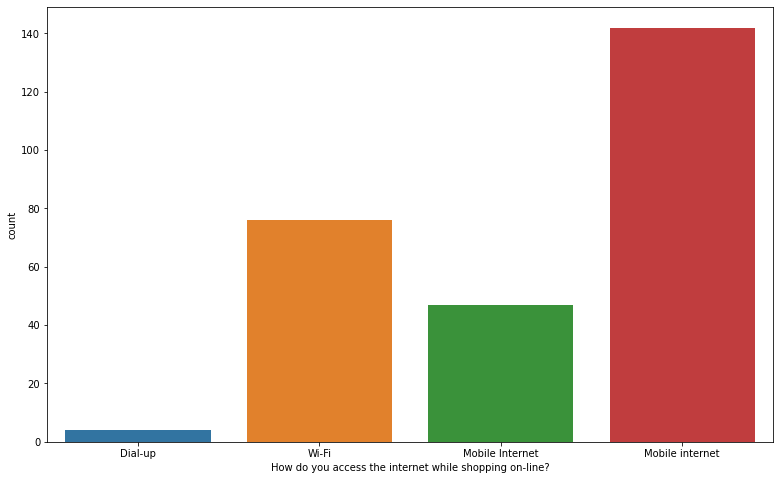

In [25]:
plt.figure(figsize=(13,8))
sns.countplot(x=df['How do you access the internet while shopping on-line?'])
print(df['How do you access the internet while shopping on-line?'].value_counts())

mostly mobile data is used to make purchases.

Smartphone    141
Laptop         86
Desktop        30
Tablet         12
Name: Which device do you use to access the online shopping?, dtype: int64


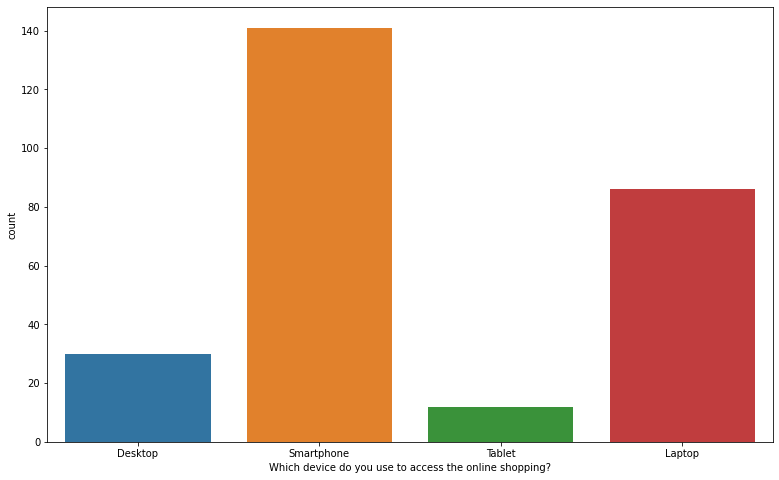

In [26]:
plt.figure(figsize=(13,8))
sns.countplot(x=df['Which device do you use to access the online shopping?'])
print(df['Which device do you use to access the online shopping?'].value_counts())

smartphones are used to make purchases most of the times.

Amazon.in                                            79
Amazon.in, Flipkart.com                              62
Flipkart.com                                         39
Amazon.in, Myntra.com                                30
Amazon.in, Paytm.com, Myntra.com                     20
Amazon.in, Flipkart.com, Myntra.com                  15
Amazon.in, Paytm.com                                 13
Flipkart.com, Paytm.com, Myntra.com, snapdeal.com    11
Name: Which of the Indian online retailer would you recommend to a friend?, dtype: int64


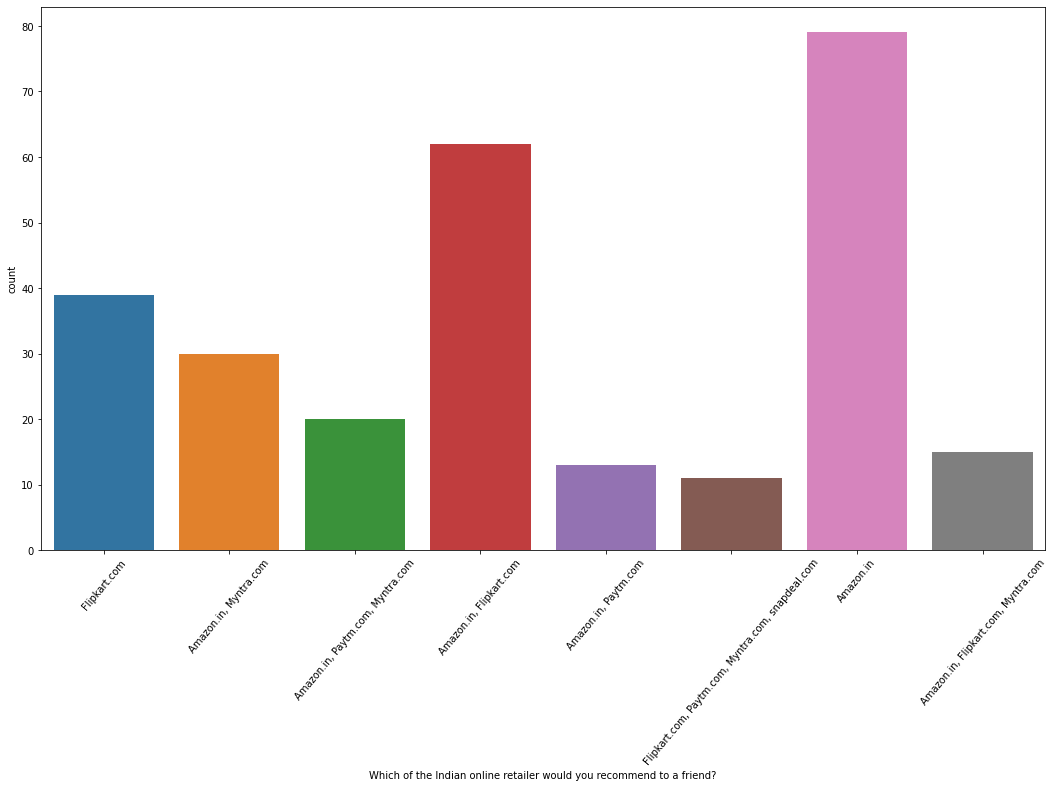

In [53]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=50)
sns.countplot(x=df['Which of the Indian online retailer would you recommend to a friend?'])
print(df['Which of the Indian online retailer would you recommend to a friend?'].value_counts())

mostly AMAZON.IN is highly recommended site to anyone.

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer delivery period, dtype: int64


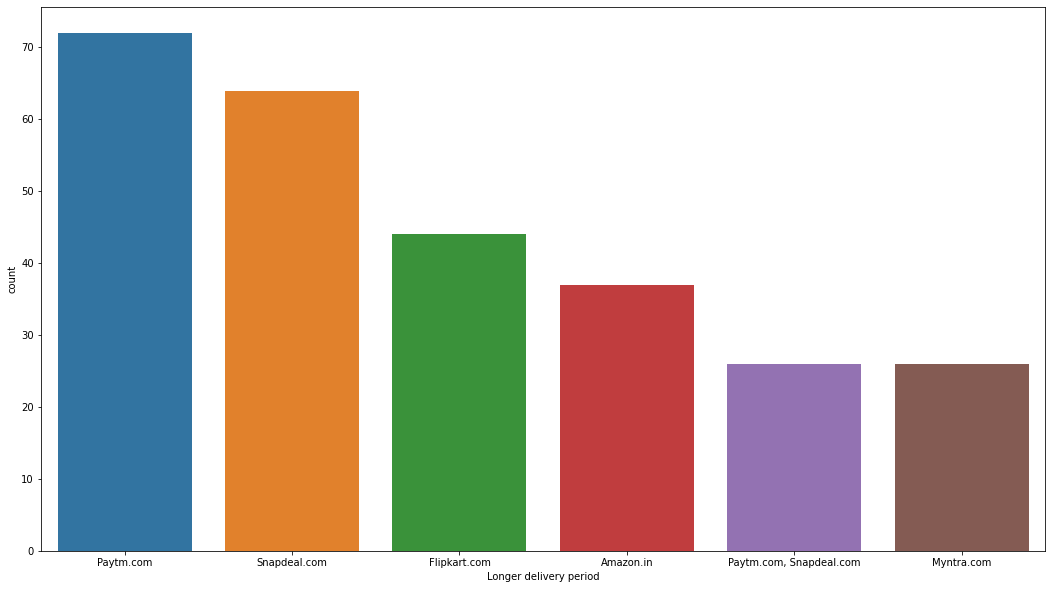

In [35]:
plt.figure(figsize=(18,10))
sns.countplot(x=df['Longer delivery period'])
print(df['Longer delivery period'].value_counts())

paytm is the only website where the delivery period is greater than the other websites.

Myntra.com                          61
Paytm.com                           59
Flipkart.com                        32
Snapdeal.com                        23
Amazon.in, Flipkart.com             18
Amazon.in                           16
Paytm.com, Snapdeal.com             15
Amazon.in, Snapdeal.com             14
Amazon.in, Paytm.com                13
Flipkart.com, Snapdeal.com          11
Amazon.in, Paytm.com, Myntra.com     7
Name: Longer page loading time (promotion, sales period), dtype: int64


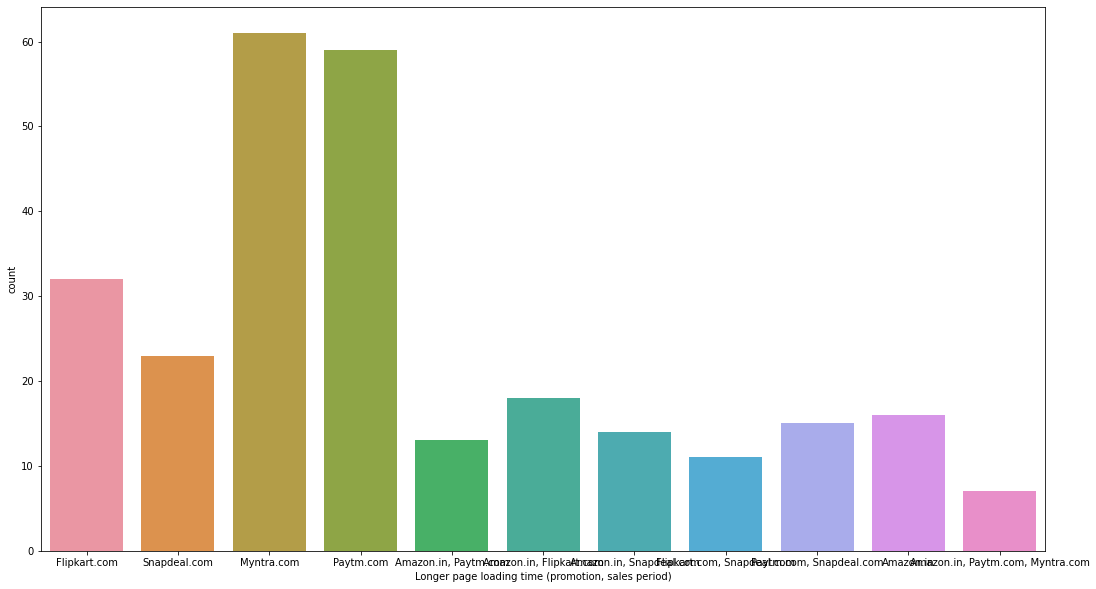

In [37]:
plt.figure(figsize=(18,10))
sns.countplot(x=df['Longer page loading time (promotion, sales period)'])
print(df['Longer page loading time (promotion, sales period)'].value_counts())

myntra and paytm have longer loading time.

31-40 years           81
21-30 years           79
41-50 yaers           70
Less than 20 years    20
51 years and above    19
Name: How old are you? , dtype: int64


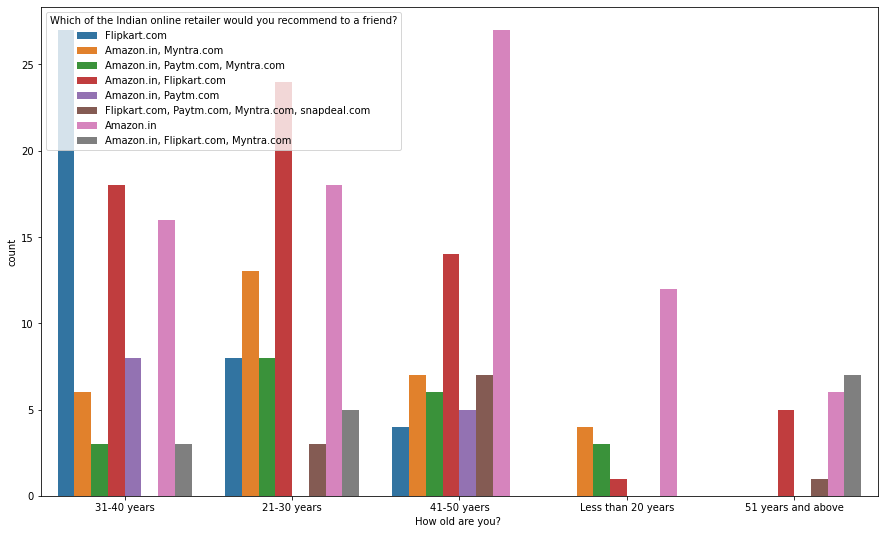

In [41]:
plt.figure(figsize=(15,9))
sns.countplot(x='How old are you? ',hue='Which of the Indian online retailer would you recommend to a friend?',data=df)
print(df['How old are you? '].value_counts())

Paytm.com                  72
Snapdeal.com               64
Flipkart.com               44
Amazon.in                  37
Paytm.com, Snapdeal.com    26
Myntra.com                 26
Name: Longer delivery period, dtype: int64


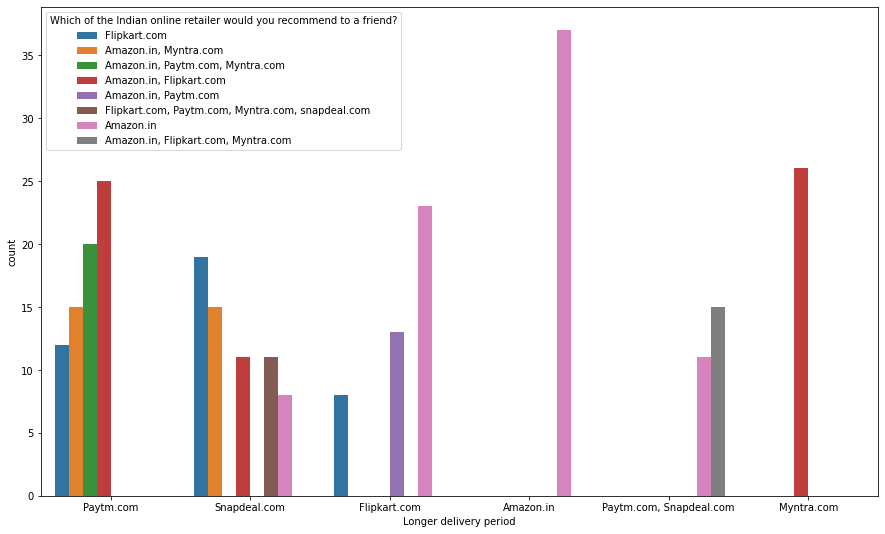

In [44]:
plt.figure(figsize=(15,9))
sns.countplot(x='Longer delivery period',hue='Which of the Indian online retailer would you recommend to a friend?',data=df)
print(df['Longer delivery period'].value_counts())

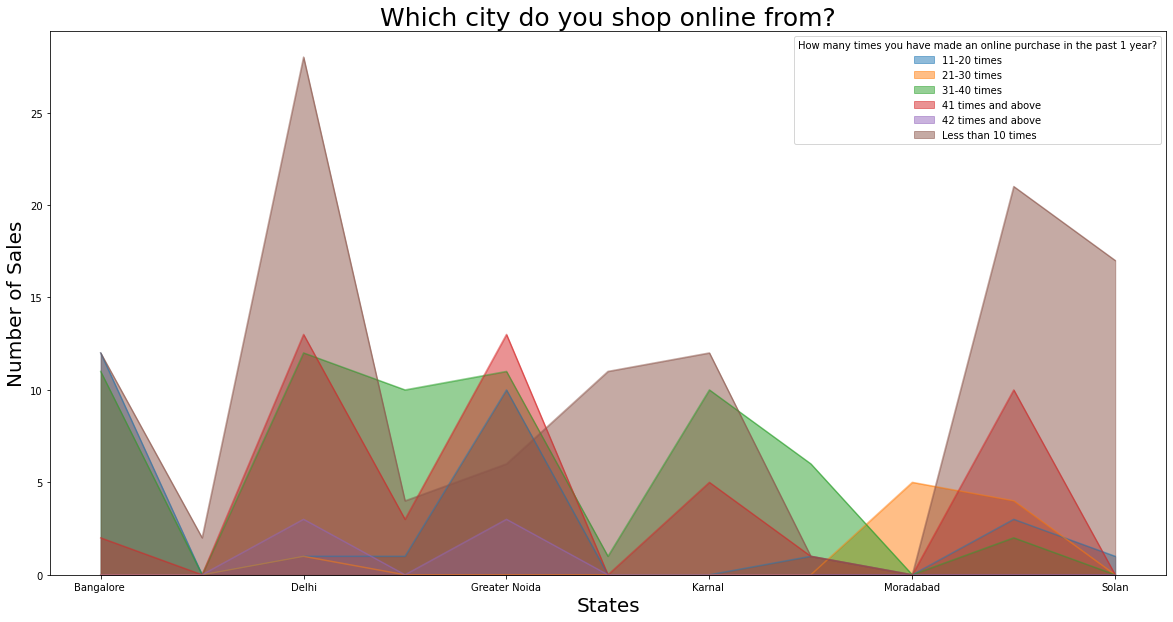

In [52]:
pd.crosstab(df['Which city do you shop online from?'],df['How many times you have made an online purchase in the past 1 year?']).plot(kind='area',stacked=False,figsize=(20,10))
plt.title('Which city do you shop online from?',fontsize=25)
plt.ylabel('Number of Sales',fontsize=20)
plt.xlabel("States",fontsize=20)
plt.show()

# conclusion and findings:

1. females do more online shopping than mens
2. delhi have higher no. of sales as compared to other states.
3. mobile internet is used to do most of the shopping.
4. most of the shopper are having the age of 31-40 years
5. paytm has longer delivery period.
6. Amazon.in is recommeded by most of the users.
7. most of the people shops less than 10 times in a year.
8. smartphone is used to make payments most of the times.